In [1]:
# Shift + Enter to run the current cell
print('Hello World')

Hello World


# This is an example Marakdown cell
This is nice to write down instructions and format text with title, **bold** and _italic_

You can change the cell type in the top bar menu

# Datasets
#### finger 
link = https://www.bbci.de/competition/download/competition_iv/BCICIV_4_mat.zip
eval = https://www.bbci.de/competition/iv/results/ds4/true_labels.zip

#### foot tracking
download page: http://neurotycho.org/expdatalist/listview?task=36


# Part 0 : import libraries

In [1]:
# Import packages

import numpy as np # library providing efficient array manipulation
import sklearn # machine learning tools
import matplotlib.pyplot as plt # matlab-like plot library

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tp # load python module written for this project

# Part 0 : Dataset

ECoG dataset of finger tapping, more details here: https://www.bbci.de/competition/iv/desc_4.pdf

### Download dataset


In [4]:
dataset_path = 'data/bciciv'
if not tp.dataset_exists(dataset_path):
    tp.download_dataset(dataset_path)
else:
    print(f'dataset already exists in {dataset_path}') 


dataset already exists in data/bciciv


### Load dataset

In [1]:
dataset = tp.load_data(dataset_path)
print(dataset)

NameError: name 'tp' is not defined

### Explore dataset

In [13]:
for subject in dataset:
    print(subject)

In [14]:
print(len(dataset))

3


In [20]:
subject0 = dataset[0] # first subject in dataset
print(subject0.train_fingers)

[[-0.40011286  0.1732757   0.99956459 -0.06184273  0.41964019]
 [-0.40011286  0.1732757   0.99956459 -0.06184273  0.41964019]
 [-0.40011286  0.1732757   0.99956459 -0.06184273  0.41964019]
 ...
 [-0.61251224 -0.34792878 -0.21741923 -0.17560933 -0.07191979]
 [-0.61251224 -0.34792878 -0.21741923 -0.17560933 -0.07191979]
 [-0.61251224 -0.34792878 -0.21741923 -0.17560933 -0.07191979]]


In [21]:
subject0.train_fingers.shape

(400000, 5)

In [26]:
# get first sample for all fingers, indexing starts at 0 /!\
subject0.train_fingers[0, :]

array([-0.40011286,  0.1732757 ,  0.99956459, -0.06184273,  0.41964019])

In [27]:
subject0.train_fingers[-1, :] # get last sample for all fingers

array([-0.61251224, -0.34792878, -0.21741923, -0.17560933, -0.07191979])

In [28]:
subject0.train_fingers[1200:1300, 4] # get 100 samples from index 1200 to 1299 for the 5th finger

array([0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964

#### Plot the data with matplotlib
You can find the documentation for the `plot` function here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

For more information, you can check the [quick start guide](https://matplotlib.org/stable/users/explain/quick_start.html)

Text(0.5, 0.98, 'Finger trajectories (train set)')

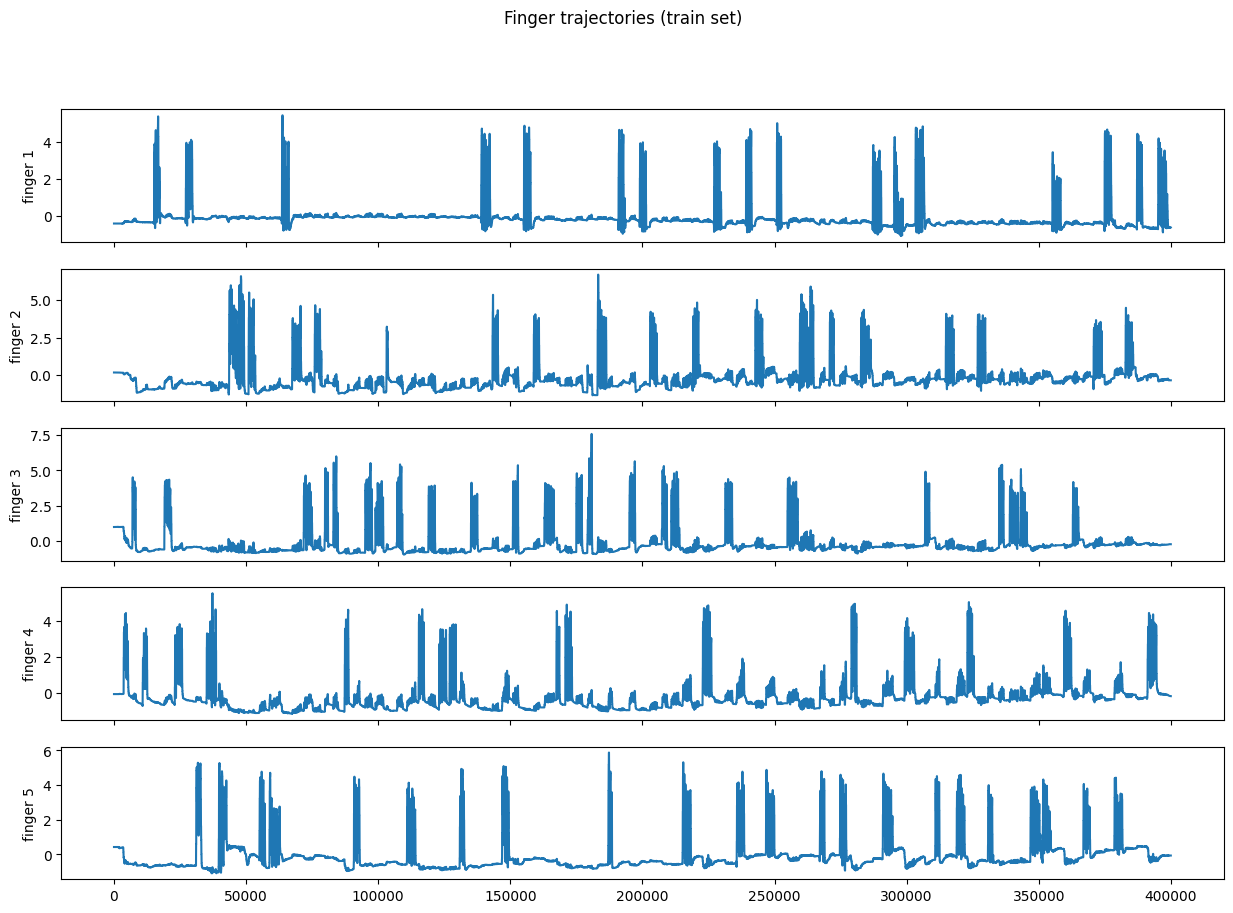

In [57]:
n_fingers = subject0.train_fingers.shape[1]

fig = plt.figure(figsize=(15,10))
axes = fig.subplots(n_fingers, 1, sharex=True)

for i in range(n_fingers):
    axes[i].plot(subject0.train_fingers[:,i])
    axes[i].set_ylabel(f'finger {i+1}')

fig.suptitle('Finger trajectories (train set)')

Text(0.5, 0.98, 'Finger trajectories (train set)')

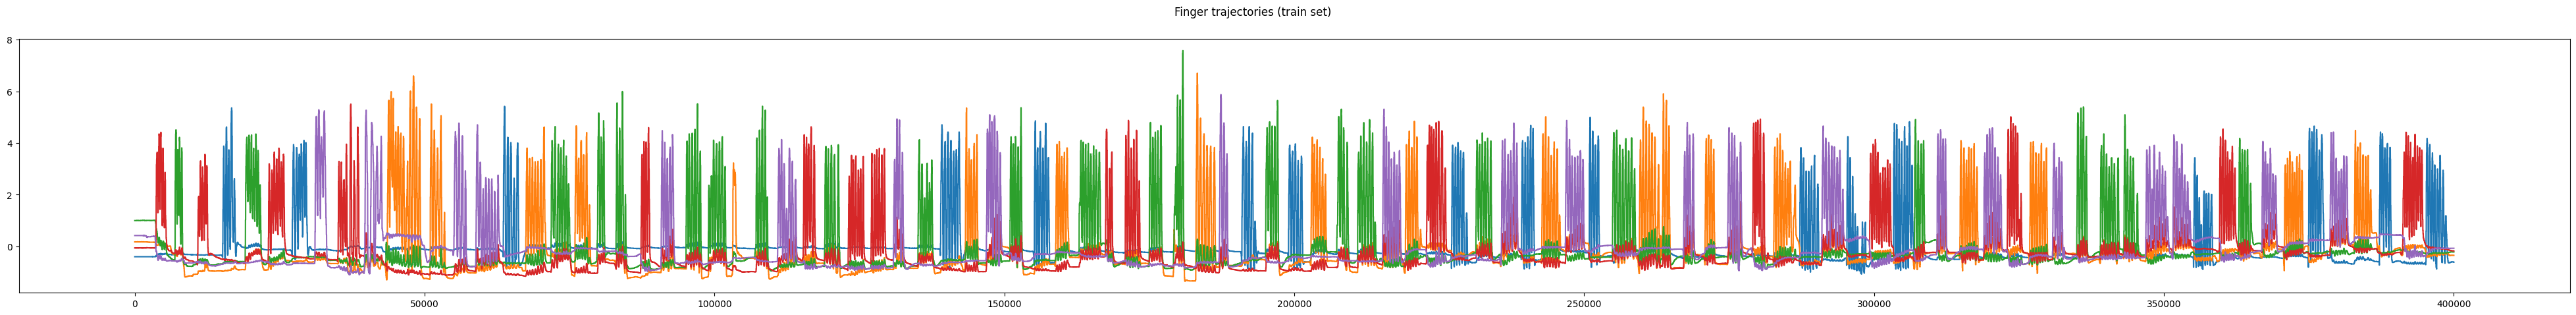

In [63]:
n_fingers = subject0.train_fingers.shape[1]

fig = plt.figure(figsize=(50,5))
ax = fig.subplots()

for i in range(n_fingers):
    ax.plot(subject0.train_fingers[:,i])

fig.suptitle('Finger trajectories (train set)')

# click on the figure to expand

# Part 1 : Dicrete decoding

In this part we will be interested in decoding finger mouvement during tapping from ECOG data and in order to do so we will focus on several main points of data processing such as 
- Pre-processing - where we will see artefact removal for example
- Feature extraction - by extracting time-frequency features on every electrodes using short term fourier transfrom
- Feature reduction using PCA

After this first part we will focus on classification paradigms with
- Cross validation in order to ensure the robustness of our testing procedure
- Classification using an LDA classifier with or without a validation set.

Finally we will evaluate the model accuracy and learn to use different metrics mainly on confusion matrices. 

## 1.1 Data pre-processing

### Artefact removal 

### Feature extraction

### Feature selection and dimensionality reduction

## 1.2 Classification

### Train-test and cross-validation 

### Get the predicted labels

### Using the validation set

### Classification

### Using the validation set

## 1.3 Metrics and confusion matrix

### The confusion matrix

### The accuracy

### Other metrics (recall, precision, balanced accuracy, F-score, gmean...)

### ROC Curve ?

# Part 2 : Continuous decoding

In this part we will be interested in decoding precise hand movements of a monkey from ECOG data and in order to do so we will procede just as in the Part 1 with
- Pre-processing - where we will see artefact removal for example
- Feature extraction - by extracting time-frequency features on every electrodes using short term fourier transfrom
- Feature reduction using PCA

After this first part we will focus on classification paradigms with
- Cross validation in order to ensure the robustness of our testing procedure
- Regression using a linear model 

Finally we will evaluate the model performances using mean square error or correlation.

## 1.1 Data pre-processing

### Artefact removal 

### Feature extraction

### Feature selection and dimensionality reduction

## 1.2 Classification

### Train-test and cross-validation 

### Get the predicted labels

### Using the validation set

## 1.3 Metrics for continuous decoding

### RMSE

### Correlation